In [29]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

**importing Trainig data**

In [30]:
train=pd.read_csv("Google_Stock_Price_Train.csv")
train.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


In [31]:
training=train.iloc[:,1:2].values
training

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

**Feature Scaling**

In [32]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
training_scaled=sc.fit_transform(training)

In [33]:
training_scaled.shape

(1258, 1)

In [34]:
training_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

**Creating a data structure with 60 timesteps and 1 output**

In [35]:
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(training_scaled[i-60:i,0])
    y_train.append(training_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [36]:
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [37]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [38]:
x_train.shape

(1198, 60)

**Reshaping**

In [12]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [13]:
x_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [14]:
x_train.shape

(1198, 60, 1)

**Building and Training the RNN**

In [15]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

**Initializing the RNN**

In [16]:
regressor=Sequential()

**Adding the first LSTM layer and some Dropout regularisation** 

In [17]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))  # first lstm layer 

C:\Users\siree\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Adding the second LSTM layer and some Dropout regularisation** 

In [18]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2)) # 2 nd

**Adding the third LSTM layer and some Dropout regularisation**

In [19]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))  # 3rd 

**Adding the fourth LSTM layer and some Dropout regularisation**

In [20]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))  # 4th 

**Adding the output layer** 

In [21]:
regressor.add(Dense(units=1))   # output

**Compiling the RNN**

In [22]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

**Fitting the RNN to the training set**

In [23]:
regressor.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - loss: 0.0901
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 0.0068
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0060
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0055
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0068
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0051
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0053
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.0044
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0050
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0052


In [24]:
pred=regressor.predict(x_train)

38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step


**Evaluating the RNN**

In [25]:
import math
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(y_train,pred))
rmse

0.043038164061670214

**predictions**

Getting the real stock of 2017

In [26]:
test=pd.read_csv("Google_Stock_Price_Test.csv")  # stock of 2017
real_stock_price=test.iloc[:,1:2].values

Getting the predicted stock price of 2017

In [27]:
total_dataset=pd.concat((train['Open'],test['Open']),axis=0)
inputs=total_dataset[len(total_dataset)-len(test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])

x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


**Visualising the results**

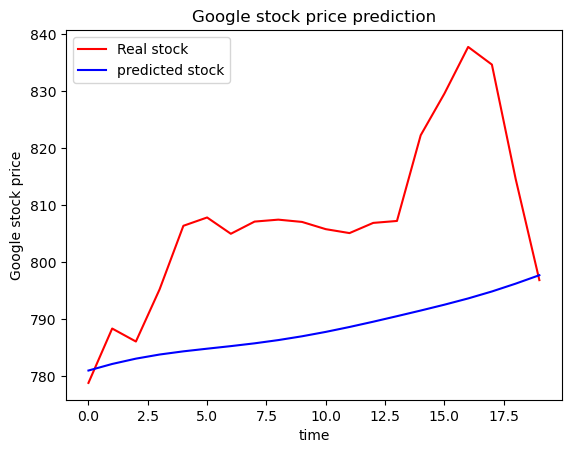

In [28]:
plt.plot(real_stock_price,color='red',label='Real stock')
plt.plot(predicted_stock_price,color='blue',label='predicted stock')
plt.title('Google stock price prediction')
plt.xlabel("time")
plt.ylabel("Google stock price")
plt.legend()
plt.show()

### **Project by : SIREESHA RAGIPATI**